<a href="https://colab.research.google.com/github/ryandhikafm/DTI-Telkom/blob/Regression/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mulitple Linear Regression

Untuk analisis bisa dilihat pada link berikut https://docs.google.com/presentation/d/12TjCf0ec9Apb1IuL11ZN8_dqCDMTbIldAt2Xy2sdvHg/edit?usp=sharing


In [32]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [33]:
# Import Dataset
df_pie = pd.read_csv('pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


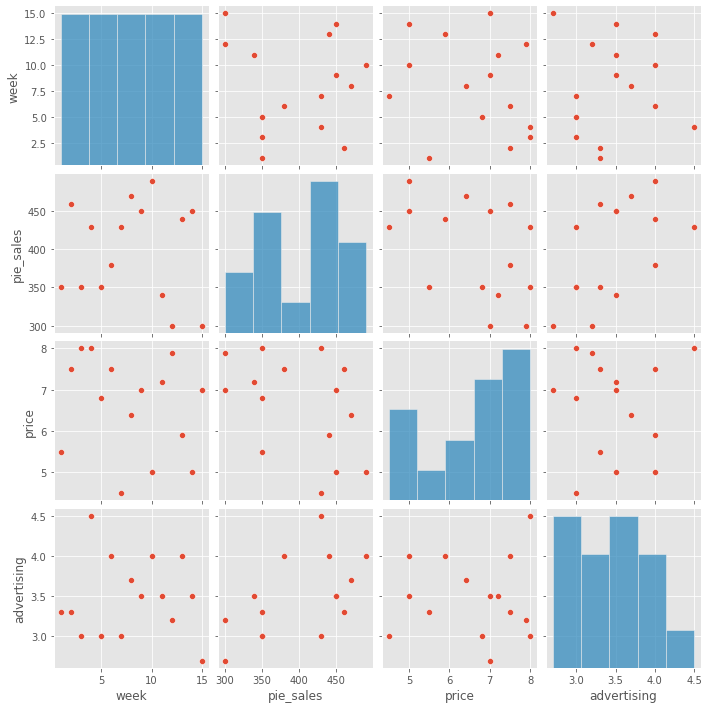

In [34]:
sns.pairplot(df_pie)
plt.show()

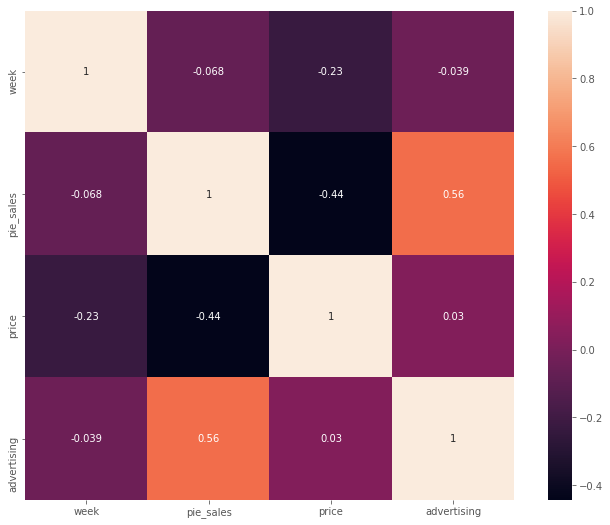

In [35]:
corrmat = df_pie.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);

In [36]:
df_pie = df_pie.drop(columns = 'week')

In [37]:
df_pie

,pie_sales,price,advertising
0,350,5.5,3.3
1,460,7.5,3.3
2,350,8.0,3.0
3,430,8.0,4.5
4,350,6.8,3.0
5,380,7.5,4.0
6,430,4.5,3.0
7,470,6.4,3.7
8,450,7.0,3.5
9,490,5.0,4.0


In [38]:
X = df_pie.drop("pie_sales", axis=1)
Y = df_pie["pie_sales"].copy()

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


In [41]:
# prediction with sklearn
new_price = float(input("Masukkan price : "))
new_ads =  float(input("Masukkan budget ads: "))
print ('Predicted  pie sales: \n', regr.predict([[new_price, new_ads]]))

Masukkan price : 7.6
Masukkan budget ads: 2.4
Predicted  pie sales: 
 [294.62981092]


In [42]:
X = sm.add_constant(X)

In [43]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions

0     413.795361
1     363.845182
2     329.118350
3     440.314786
4     359.088457
5     415.736852
6     416.531163
7     420.970163
8     391.158918
9     478.174576
10    386.163900
11    346.442050
12    455.696995
13    441.109097
14    331.854152
dtype: float64

In [44]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        10:53:09   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      